# Implementación de un Perceptrón Multicapa desde Cero

En esta sección, implementaremos un perceptrón multicapa (MLP) desde cero utilizando NumPy. Veremos cómo se construyen las redes neuronales, cómo se realiza el entrenamiento mediante retropropagación y cómo se ajustan los pesos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


Creamos arrays de valores para una XOR

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

Definimos la funcion de activacion sigmoid

In [3]:
# Función de Activación Sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [4]:
# Inicialización de Pesos
input_layer_neurons = 2  # Número de características en los datos de entrada
hidden_layer_neurons = 4 # Número de neuronas en la capa oculta
output_neurons = 1       # Número de neuronas en la capa de salida

np.random.seed(1)
hidden_layer_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
output_layer_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
hidden_layer_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_layer_bias = np.random.uniform(size=(1, output_neurons))


Forward pass bàsico que realiza los productos punto de las entradas con los pesos y suma el bias 

In [5]:
# Forward Pass
def forward_pass(X):
    global hidden_layer_weights, output_layer_weights
    global hidden_layer_bias, output_layer_bias

    hidden_layer_activation = np.dot(X, hidden_layer_weights) + hidden_layer_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_layer_weights) + output_layer_bias
    output = sigmoid(output_layer_activation)

    return output, hidden_layer_output


Tomando los datos de salida definde los gradientes y realiza los productos punto hacia atràs en la red.

In [6]:
# Backpropagation
def backward_pass(X, y, output, hidden_layer_output, learning_rate=0.5):
    global hidden_layer_weights, output_layer_weights
    global hidden_layer_bias, output_layer_bias

    error = y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden_layer = d_output.dot(output_layer_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    output_layer_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    output_layer_bias += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    hidden_layer_weights += X.T.dot(d_hidden_layer) * learning_rate
    hidden_layer_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate


Para el entrenamiento se definen los epoch, el lr y mediante un ciclo for se realiza el forward y el backward. Luego se vsualiza el error en un gràfico para cada epoch.
Tambièn printea los valores predichos por la red para las entradas con los pesos aprendidos.

Epoch 0, Error: 0.377696270364565
Epoch 1000, Error: 0.24973421384077332
Epoch 2000, Error: 0.24910724662782735
Epoch 3000, Error: 0.24489249783037087
Epoch 4000, Error: 0.21356464173257256
Epoch 5000, Error: 0.14930623496211726
Epoch 6000, Error: 0.05359700980040481
Epoch 7000, Error: 0.017920859349063414
Epoch 8000, Error: 0.009087690742437992
Epoch 9000, Error: 0.005743294694711749


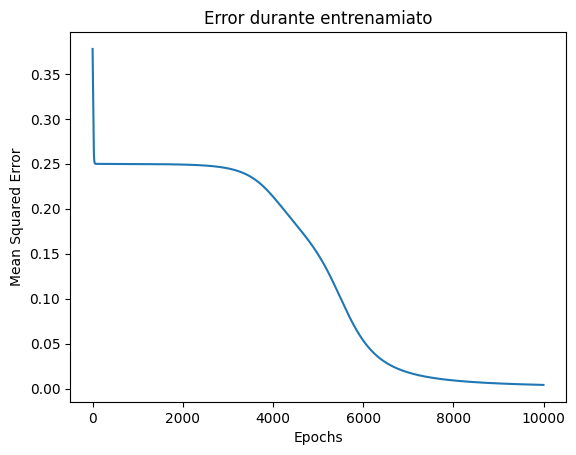

Predicciones finales:
[[0.06499722]
 [0.94286693]
 [0.93305962]
 [0.06620534]]
Salidas reales:
[[0]
 [1]
 [1]
 [0]]


In [7]:
# Entrenamiento del MLP
epochs = 10000
learning_rate = 0.1
errors = []

for epoch in range(epochs):
    output, hidden_layer_output = forward_pass(X)
    backward_pass(X, y, output, hidden_layer_output, learning_rate)
    
    # Guardar el error para visualizar
    mse = np.mean(np.square(y - output))
    errors.append(mse)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {mse}")

# Visualización del error durante el entrenamiento
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Error durante entrenamiato')
plt.show()

# Predicciones finales
output, _ = forward_pass(X)
print("Predicciones finales:")
print(output)

print("Salidas reales:")
print(y)
